In [334]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

In [7]:
def xavier_initializer(in_nodes, out_nodes):
    return np.random.normal(0, np.sqrt(2/(in_nodes + out_nodes)), size=(in_nodes, out_nodes))

In [8]:
def ReLU(x):
    temp = np.copy(x)
    temp[np.where(x < 0)] = 0
    return temp

In [9]:
def ReLU_derivative(x):
    dt = np.ones(x.shape)
    dt[np.where(x < 0)] = 0
    return dt

# Linear Regression

In [13]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x * 17 + 54

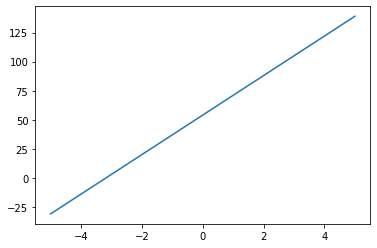

In [20]:
plt.plot(x, y);

In [14]:
def line_regression_train():
    w = np.random.rand(1, 1)
    b = 0
    lr = 1e-3
    numb_epochs = 50000
    for i in range(numb_epochs):
        inputs = x
        z = np.dot(inputs, w) + b
        a = z
        loss = np.mean((a - y)**2)

        dz_dw = inputs.T
        da_dz = 1
        dL_da = 2*(a - y)
        dL_dw = np.dot(dz_dw, da_dz * dL_da) / 10
        w = w - dL_dw * lr
        
        dL_db = np.mean(1 * da_dz * dL_da, axis=0)
        b = b - dL_db * lr

    print(w.item(), b.item(), loss)
    return w.item(), b.item()

In [15]:
w, b = line_regression_train()

16.999999999999993 53.99999999999823 3.128865445483086e-24


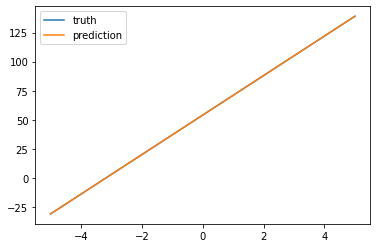

In [19]:
plt.plot(x, y, label="truth")
plt.plot(x, np.dot(x, w) + b, label="prediction")
plt.legend()
plt.show()

# Scratch Work

## Initialization

In [21]:
num_inputs, num_hidden, num_outputs = 1, 2, 1

w1 = np.random.rand(num_inputs, num_hidden)
b1 = np.random.rand(num_hidden)
w2 = np.random.rand(num_hidden, num_outputs)
b2 = np.random.rand(num_outputs)

print(f"shape of x: {x.shape} shape of y: {y.shape} shape of w1: {w1.shape} shape of b1: {b1.shape} shape of w2: {w2.shape} shape of b2: {b2.shape}")

shape of x: (100, 1) shape of y: (100, 1) shape of w1: (1, 2) shape of b1: (2,) shape of w2: (2, 1) shape of b2: (1,)


## Forward

In [22]:
# First Layer Forward
h1 = np.dot(x, w1) + b1
a1 = sigmoid(h1)
print(f"shape of h1: {h1.shape}")

# Second Layer Forward
h2 = np.dot(a1, w2) + b2
a2 = h2
print(f"shape of h2: {h2.shape}")

shape of h1: (100, 2)
shape of h2: (100, 1)


## Backward

In [23]:
# Calculate Gradients

# Second Layer Backward
dL_da = 2 * (a2 - y)
da_dh = 1
dh_dw = a1.T

dL_dw2 = np.dot(dh_dw, dL_da)
print(f"shape of derivative of w2: {dL_dw2.shape}")

dh_db = 1
dL_db2 = np.mean(dL_da, axis=0)
print(f"shape of derivative of b2: {dL_db2.shape}")

shape of derivative of w2: (2, 1)
shape of derivative of b2: (1,)


In [24]:
# First Layer Backward
dL_da = np.dot(2 * (a2 - y), w2.T)
da_dh = sigmoid_derivative(h1)
dh_dw = x.T

dL_dw1 = np.dot(dh_dw, dL_da * da_dh)
print(f"shape of dL_dw1: {dL_dw1.shape}")

dh_db = 1
dL_db1 = np.mean(dL_da * da_dh * dh_db, axis=0)
print(f"shape of dL_db1: {dL_db1.shape}")

shape of dL_dw1: (1, 2)
shape of dL_db1: (2,)


In [25]:
# Change Gradients
w2 = w2 - dL_dw2
b2 = b2 - dL_db2
w1 = w1 - dL_dw1
b1 = b1 - dL_db1

## Putting it all in a function

In [62]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x * 3 + 4

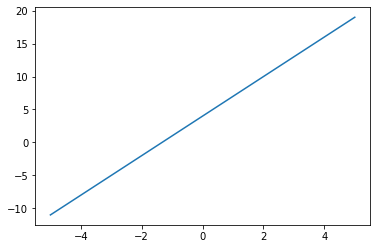

In [63]:
plt.plot(x, y)

In [64]:
def train_two_layer_net(num_epochs=1000, hidden_nodes=2, lr=1e-3):
    num_inputs, num_outputs = 1, 1

    w1 = np.random.rand(num_inputs, hidden_nodes)
    b1 = np.random.rand(hidden_nodes)
    w2 = np.random.rand(hidden_nodes, num_outputs)
    b2 = np.random.rand(num_outputs)

    for i in range(num_epochs):
        # First Layer Forward
        z1 = np.dot(x, w1) + b1
        a1 = sigmoid(z1)

        # Second Layer Forward
        z2 = np.dot(a1, w2) + b2
        a2 = z2

        loss = np.mean((a2 - y) ** 2)

        # Calculate Gradients

        # Second Layer Backward
        dL_da2 = 2 * (a2 - y)
        da2_dz2 = 1
        dz2_dw2 = a1.T

        dL_dw2 = np.dot(dz2_dw2, dL_da2 * da2_dz2)

        dz2_db2 = 1
        dL_db2 = np.mean(dL_da2 * da2_dz2 * dz2_db2, axis=0)

        # First Layer Backward
        dL_da1 = np.dot(dL_da2 * da2_dz2, w2.T)
        da1_dz1 = sigmoid_derivative(z1)
        dz1_dw1 = x.T

        dL_dw1 = np.dot(dz1_dw1, dL_da1 * da1_dz1)

        dz1_db1 = 1
        dL_db1 = np.mean(dL_da1 * da1_dz1 * dz1_db1, axis=0)

        # Change Gradients
        w2 = w2 - dL_dw2 * lr
        b2 = b2 - dL_db2 * lr
        w1 = w1 - dL_dw1 * lr
        b1 = b1 - dL_db1 * lr

        # if i % 1000 == 0:
        #     print("W1 Grad: ", np.mean(dL_dw1), "W2 Grad: ", np.mean(dL_dw2))
        print(loss)
    return w1, b1, w2, b2

In [ ]:
w1, b1, w2, b2 = train_two_layer_net(1000, 2, 1e-2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


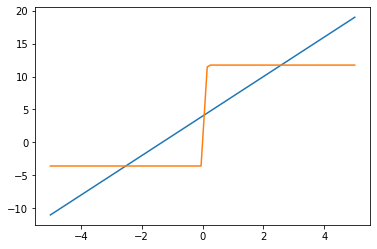

In [66]:
plt.plot(x, y)

out = np.dot(x, w1) + b1
out = sigmoid(out)
out = np.dot(out, w2) + b2
plt.plot(x, out)
plt.show()

# Scratch Work for N Layers

## Setup

In [ ]:
architecture = [1, 2, 3, 2, 1]
weights = []
biases = []

for i in range(len(architecture)-1):
    in_node = architecture[i]
    out_node = architecture[i+1]
    w = xavier_initializer(in_node, out_node)
    b = np.zeros((out_node))

    weights.append(w)
    biases.append(b)

In [ ]:
for i in range(len(weights)):
    print(weights[i].shape, biases[i].shape)

(1, 2) (2,)
(2, 3) (3,)
(3, 2) (2,)
(2, 1) (1,)


## Forward

In [ ]:
a_vals = []
z_vals = []
activations = ["ReLU", "ReLU", "ReLU", "None"]

for i in range(len(weights)):
    if i == 0:
        z = np.dot(x, weights[0]) + biases[0]
    else:
        z = np.dot(a_vals[i-1], weights[i]) + biases[i]
    
    if activations[i] == "Sigmoid":
        a = sigmoid(z)
    elif activations[i] == "ReLU":
        a = ReLU(z)
    else:
        a = z

    z_vals.append(z)
    a_vals.append(a)

for i in range(len(z_vals)):
    print(z_vals[i].shape, a_vals[i].shape)

(100, 2) (100, 2)
(100, 3) (100, 3)
(100, 2) (100, 2)
(100, 1) (100, 1)


## Backward

In [ ]:
loss = np.mean((a_vals[-1] - y) ** 2)
print(loss)

130.3706755020207


### Calculate Gradients

In [ ]:
dL_da_vals = []
da_dz_vals = []

d_weights = []
d_biases = []

for i in range(len(weights)-1, -1, -1):
    print(i+1)

    if activations[i] == "Sigmoid":
        da_dz = sigmoid_derivative(z_vals[i])
    elif activations[i] == "ReLU":
        da_dz = ReLU_derivative(z_vals[i])
    else:
        da_dz = 1

    if i == len(weights)-1:
        dL_da = 2 * (a_vals[-1] - y)

    else:
        dL_da = np.dot(dL_da_vals[-1] * da_dz_vals[-1], weights[i+1].T)  

    if i == 0:
        dz_dw = x.T
    else:
        dz_dw = a_vals[i-1].T

    dw = np.dot(dz_dw, dL_da * da_dz)
    d_weights.append(dw)

    dz_db = 1
    db = np.mean(dL_da * da_dz * dz_db, axis=0)
    d_biases.append(db)

    dL_da_vals.append(dL_da)
    da_dz_vals.append(da_dz)

4
3
2
1


### Apply Gradients

In [ ]:
for i in range(len(weights)):
    weights[i] -= d_weights[len(weights)-i-1]
for i in range(len(biases)):
    biases[i] -= d_biases[len(biases)-i-1]

## Put in a function

In [ ]:
def forward(x, weights, biases, activations):
    a_vals = []
    z_vals = []
    for i in range(len(weights)):
        if i == 0:
            z = np.dot(x, weights[0]) + biases[0]
        else:
            z = np.dot(a_vals[-1], weights[i]) + biases[i]
        
        if activations[i] == "Sigmoid":
            a = sigmoid(z)
        elif activations[i] == "ReLU":
            a = ReLU(z)
        else:
            a = z

        z_vals.append(z)
        a_vals.append(a)
    return a_vals, z_vals

In [ ]:
def n_layer_train(x, y, architecture, activations, numb_epochs=5, lr=1e-3):
    # Setup
    weights = []
    biases = []

    min_loss = 10000000000

    for i in range(len(architecture)-1):
        in_node = architecture[i]
        out_node = architecture[i+1]
        w = xavier_initializer(in_node, out_node)
        b = np.zeros((out_node,))

        weights.append(w)
        biases.append(b)

    losses = []
    for epoch in range(1, numb_epochs+1):
        # Forward
        a_vals, z_vals = forward(x, weights, biases, activations)

        loss = np.mean((a_vals[-1] - y) ** 2)
        losses.append(loss)
        if loss < min_loss:
            best_weights = weights
            best_biases = biases
        # print(loss)


        # Calculate Gradients
        dL_da_vals = []
        da_dz_vals = []

        d_weights = [0] * len(weights)
        d_biases = [0] * len(weights)

        for i in range(len(weights)-1, -1, -1):
            # print(i)
            if activations[i] == "Sigmoid":
                da_dz = sigmoid_derivative(z_vals[i])
            elif activations[i] == "ReLU":
                da_dz = ReLU_derivative(z_vals[i])
            else:
                da_dz = 1

            if i == len(weights)-1:
                dL_da = 2 * (a_vals[-1] - y)

            else:
                dL_da = np.dot(dL_da_vals[-1] * da_dz_vals[-1], weights[i+1].T)

            if i == 0:
                dz_dw = x.T
            else:
                dz_dw = a_vals[i-1].T

            dw = np.dot(dz_dw, dL_da * da_dz)/x.shape[0]
            d_weights[i] = dw

            dz_db = 1
            db = np.mean(dL_da * da_dz * dz_db, axis=0)
            d_biases[i] = db

            dL_da_vals.append(dL_da)
            da_dz_vals.append(da_dz)

        # Applying Gradients
        for i in range(len(weights)):
            weights[i] -= d_weights[i] * lr
            biases[i] -= d_biases[i] * lr

    print(loss)
    return best_weights, best_biases, losses

In [ ]:
activations = ["ReLU", "ReLU", "ReLU", "None"]
weights, biases, losses = n_layer_train(x, y, [1, 4, 4, 4, 1], activations, 10000, 3e-3)

0.13815572186716338


In [ ]:
a_vals = []
z_vals = []

for i in range(len(weights)):
    if i == 0:
        z = np.dot(x, weights[0]) + biases[0]
    else:
        z = np.dot(a_vals[-1], weights[i]) + biases[i]
    
    if activations[i] == "Sigmoid":
        a = sigmoid(z)
    elif activations[i] == "ReLU":
        a = ReLU(z)
    else:
        a = z
    a_vals.append(a)
    z_vals.append(z)

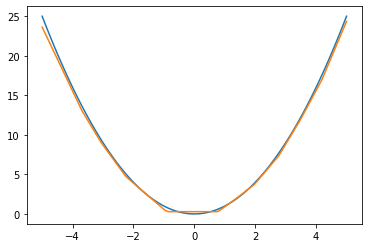

In [ ]:
plt.plot(x, y)
plt.plot(x, a)
plt.show()

# Class Method

## Define Classes

In [ ]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        z = np.dot(inputs, self.weights) + self.biases
        return z
    
    def backward(self, dL_da, da_dz, dz_dw, dz_db):
        self.dw = np.dot(dz_dw, dL_da * da_dz)
        self.db = np.mean(dz_db * dL_da * da_dz, axis=0)
        return self.dw, self.db
    
    def step(self, dw, db, lr):
        self.weights = self.weights - dw * lr
        self.biases = self.biases - db * lr
    
    def __call__(self, x):
        return self.forward(x)

In [ ]:
class Sigmoid:
    def __init__(self):
        pass

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

    def backward(self, x):
        return self.sigmoid(x)*(1-self.sigmoid(x))
    
    def __call__(self, x):
        return self.forward(x)


In [ ]:
class ReLU:
    def __init__(self):
        pass

    def forward(self, x):
        temp = np.copy(x)
        temp[np.where(x < 0)] = 0
        return temp

    def backward(self, x):
        dt = np.ones(x.shape)
        dt[np.where(x < 0)] = 0
        return dt

    def __call__(self, x):
        return self.forward(x)

In [ ]:
sig = Sigmoid()
relu = ReLU()

## One Layer Train

In [ ]:
def one_layer_train(x, y, numb_epochs=5, lr=1e-3):
    input_nodes, output_nodes = 1, 1
    weights = xavier_initializer(input_nodes, output_nodes)
    biases = np.zeros(output_nodes,)
    lin = Linear(weights, biases)

    for epoch in range(1, numb_epochs+1):
        # Forward
        z = lin.forward(x)
        a = z

        loss = np.mean((a - y) ** 2)
        # print(loss)

        # Calculate Gradients
        dL_da = 2 * (a - y)
        da_dz = 1
        dz_dw = x.T
        dz_db = 1

        dw, db = lin.backward(dL_da, da_dz, dz_dw, dz_db)
        dw = dw/x.shape[0]

        # Apply Gradients
        lin.step(dw, db, lr)
    print(loss)
    return lin

In [ ]:
layer = one_layer_train(x, y, 50000, 1e-3)

2.3363372615977772e-23


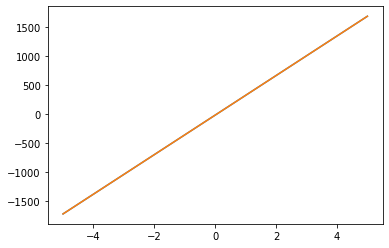

In [ ]:
plt.plot(x, y)
plt.plot(x, layer.predict(x))
plt.show()

## Two Layer Train

In [ ]:
def two_layer_train(x, y, numb_epochs=5, lr=1e-3, hidden_layer_nodes=1):
    input_nodes, output_nodes = 1, 1
    w1 = xavier_initializer(input_nodes, hidden_layer_nodes)
    b1 = np.zeros((hidden_layer_nodes))
    w2 = xavier_initializer(hidden_layer_nodes, output_nodes)
    b2 = np.zeros((output_nodes))

    layer1 = Linear(w1, b1)
    sig = Sigmoid()
    relu = ReLU()
    layer2 = Linear(w2, b2)

    for epoch in range(1, numb_epochs+1):
        # Forward
        z1 = layer1.forward(x)
        a1 =  relu(z1)

        # print(a1.shape, w2.shape)

        z2 = layer2.forward(a1)
        a2 = z2

        loss = np.mean((a2 - y) ** 2)
        # print(loss)

        # Calculate Gradients

        dL_da = 2 * (a2 - y)
        da_dz = 1
        dz_dw = a1.T
        dz_db = 1

        dw2, db2 = layer2.backward(dL_da, da_dz, dz_dw, dz_db)
        dw2 = dw2/x.shape[0]

        dL_da = np.dot(dL_da * da_dz, w2.T)
        da_dz = relu.backward(z1)
        dz_dw = x.T
        dz_db = 1

        dw1, db1 = layer1.backward(dL_da, da_dz, dz_dw, dz_db)
        dw1 = dw1/x.shape[0]

        # Apply Gradients
        layer2.step(dw2, db2, lr)
        layer1.step(dw1, db1, lr)
    print(loss)
    return layer1, layer2

In [ ]:
layer1, layer2 = two_layer_train(x, y, 10000, 5e-3, 10)

0.07689924946131971


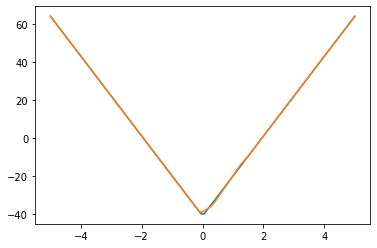

In [ ]:
out = layer1(x)
out = relu(out)
out = layer2(out)

plt.plot(x, y)
plt.plot(x, out)
plt.show()

# V2 (Final Version)

In [429]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
y = x ** 3 + 54

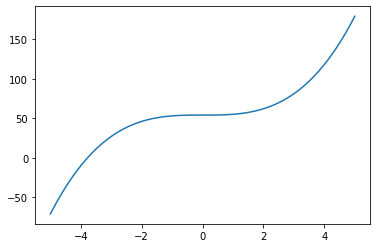

In [430]:
plt.plot(x, y);

In [316]:
class ReLU_v2:
    def __init__(self):
        self.inputs = 1

    def forward(self, x):
        self.inputs = x
        temp = np.copy(x)
        temp[np.where(x < 0)] = 0
        return temp

    def backward(self, dL_da):
        da_dz = np.ones(self.inputs.shape)
        da_dz[np.where(self.inputs < 0)] = 0

        dL_dz = dL_da * da_dz
        return dL_dz
    
    def step(self):
        pass
    
    def save(self):
        pass

    def predict(self, x):
        return self.forward(x)

    def __call__(self, x):
        return self.forward(x)

In [317]:
class Linear_v2:
    def __init__(self, weights, biases, lr):
        self.weights = weights
        self.biases = biases
        self.best_weights = weights
        self.best_biases = biases
        self.dw = 1
        self.db = 1
        self.inputs = 1
        self.lr = lr

    def forward(self, inputs):
        self.inputs = inputs
        z = np.dot(inputs, self.weights) + self.biases
        return z
    
    def backward(self, dL_dz):
        dz_dw = self.inputs.T
        self.dw = np.dot(dz_dw, dL_dz)/self.inputs.shape[0]
        dz_db = 1
        self.db = np.mean(dz_db * dL_dz, axis=0)

        # Computations
        dz_da = self.weights.T
        da = np.dot(dL_dz, dz_da)
        return da
    
    def step(self):
        self.weights = self.weights - self.dw * self.lr
        self.biases = self.biases - self.db * self.lr

    def save(self):
        self.best_weights = self.weights
        self.best_biases = self.biases\

    def predict(self, inputs):
        z = np.dot(inputs, self.best_weights) + self.best_biases
        return z

    def __call__(self, x):
        return self.forward(x)

In [328]:
def final_train(x, y, architecture, numb_epochs=5, lr=1e-3):
    input_nodes, output_nodes = 1, 1
    best_loss = 1e10

    weights = []
    biases = []
    nodes = [input_nodes] + architecture
    nodes.append(output_nodes)
    print(nodes)
    for i in range(len(architecture)+1):
        w = xavier_initializer(nodes[i], nodes[i+1])
        b = np.zeros((nodes[i+1]))

        weights.append(w)
        biases.append(b)
    
    layers = []
    for i in range(len(architecture)+1):
        layer = Linear_v2(weights[i], biases[i], lr)
        layers.append(layer)

        if i < len(architecture):
            layer = ReLU_v2()
            layers.append(layer)

    for epoch in range(1, numb_epochs+1):
        # Forward
        curr_input = x

        for i in range(len(layers)):
            layer = layers[i]
            out = layer.forward(curr_input)
            curr_input = out


        loss = np.mean((out - y) ** 2)
        print(loss)

        if loss < best_loss:
            best_loss = loss
            for layer in layers:
                layer.save()

        # Calculate Gradients
        dL_dz2 = 2 * (out - y)
        next_grad = dL_dz2
        for i in range(len(layers)-1, -1, -1):
            layer = layers[i]
            next_grad = layer.backward(next_grad)   

        # Apply Gradients
        for layer in layers:
            layer.step()

    return layers, relu

In [431]:
architecture = [10]

In [436]:
layers, relu = final_train(x, y, architecture, 20000, 1e-3)

Streaming output truncated to the last 5000 lines.
5.86636773061251
5.866305928464173
5.8670618814613
5.866611877919992
5.867402495925477
5.86672595742905
5.867777336758125
5.866884938844384
5.866383079730416
5.866238739165085
5.866925746674549
5.8665200902256425
5.8674678400800095
5.866713384646679
5.8676324625034235
5.866786774447851
5.8663153034089826
5.8662024599244456
5.8670074601371764
5.866509785387825
5.8673448769153405
5.86662565310259
5.867718217053709
5.866824945007959
5.866322935393867
5.866148334466908
5.8668706618121735
5.866419497586826
5.867401599387434
5.866628538683565
5.866191220514408
5.866152034512945
5.866755713104201
5.8664361641332725
5.867315292512764
5.8666327160528935
5.867490833791972
5.866662118286654
5.866193344451344
5.866126748905892
5.866883522153645
5.866433450034845
5.8672217912682445
5.866556112959723
5.867606835600347
5.866708042142967
5.866208993487952
5.866070220730682
5.866754243248779
5.8663442012694995
5.867294638767804
5.866535344440141
5.8674

In [437]:
curr_input = x

for i in range(len(layers)):
    layer = layers[i]
    out = layer.predict(curr_input)
    curr_input = out

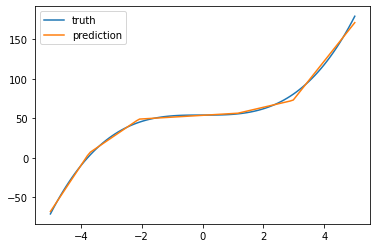

In [438]:
plt.plot(x, y, label="truth")
plt.plot(x, out, label="prediction")
plt.legend()
plt.show()

In [402]:
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = x ** 2

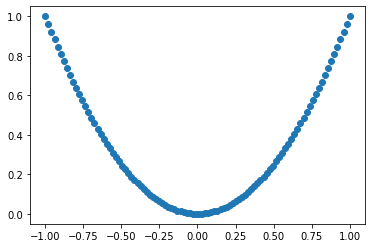

In [403]:
plt.plot(x, y, 'o');

In [422]:
architecture = [5, 10]
layers, relu = final_train(x, y, architecture, 20000, 1e-1)

Streaming output truncated to the last 5000 lines.
0.00014875856108434977
0.00014874157807964847
0.00014872460660377847
0.00014870768405268517
0.00014869083389741703
0.0001486738816479481
0.00014865694058736187
0.0001486400468091916
0.00014862322717310651
0.0001486063049961247
0.00014858939385276355
0.00014857252520007335
0.00014855573930734262
0.00014853884683989907
0.00014852227335002211
0.00014850569967827238
0.00014848878063367994
0.00014847205519278602
0.00014845518249996382
0.00014843832786343256
0.00014842154447399704
0.00014840479993317315
0.00014838796846742026
0.00014837114933085414
0.00014835441071427288
0.00014833768212013643
0.00014832088237591638
0.00014830409392045405
0.00014828738445867124
0.00014827068481974325
0.00014825391491197218
0.00014823715594944675
0.0001482205916564673
0.00014820422097457
0.000148187432936324
0.0001481706887987154
0.00014815395934424347
0.00014813736174916836
0.00014812067617903828
0.0001481039678944161
0.00014808727262904746
0.000148071193541

In [423]:
curr_input = x

for i in range(len(layers)):
    layer = layers[i]
    out = layer.predict(curr_input)
    curr_input = out

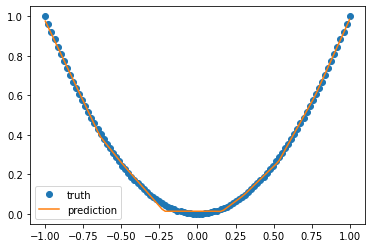

In [424]:
plt.plot(x, y, 'o', label="truth")
plt.plot(x, out, label="prediction")
plt.legend()
plt.show()